# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Rotem M 1752

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Chatgpt
Goal: הסבר, אימות עמידה בדרישות המטלה, שיפור תצוגת הטבלאות
Propmpt1:
    תסביר את 5 fold cross validation בשיטת grid search
Propmpt2:
    קטע הקוד הזה עונה הדרישות שהצגתי מקודם? שימוש ב5-fold-cross-validation עם grid search
Propmpt3: 
  תסדר את הטבלה שתהיה יותר ברורה לקריאה
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
בעיית הלמידה היא בעיית סיווג בינרי: חיזוי האם הנוסע שרד או לא. הדאטאסט כולל קבצי אימון וטסט שבהם כל שורה מתארת נוסע לפי מאפיינים שונים - מחלקה, מין, גיל, מספר קרובים, מחיר כרטיס ונמל עלייה. האתגר כולל בחירת אלגוריתם למידה, ביצוע Feature engineering וטיונינג היפר-פרמטרים תוך שימוש בולידציה.
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [43]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.base import clone
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
# קריאת הנתונים
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
# הצגת הנתונים הראשוניים של ה-Train וה-Test set
print("Train set:")
print(train_df.head())
print("Test set:")
print(test_df.head())

Train set:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0
Test set:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [47]:
# הצגת סטטיסטיקות כלליות על ה-Train וה-Test set
train_stats = train_df.describe(include='all')
test_stats = test_df.describe(include='all')

# הדפסת הסטטיסטיקות בצורה מסודרת
print("Train set statistics:")
print(train_stats)

print("Test set statistics:")
print(test_stats)

Train set statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.0

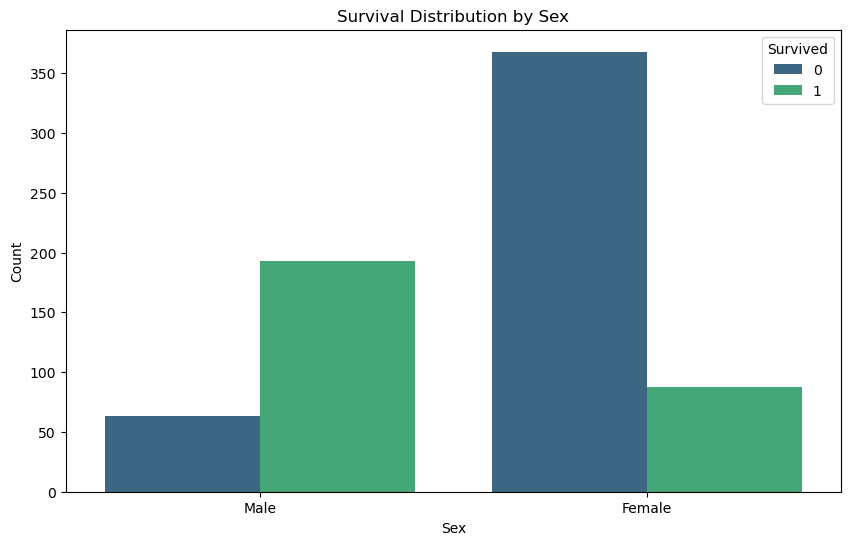

<Figure size 1000x600 with 0 Axes>

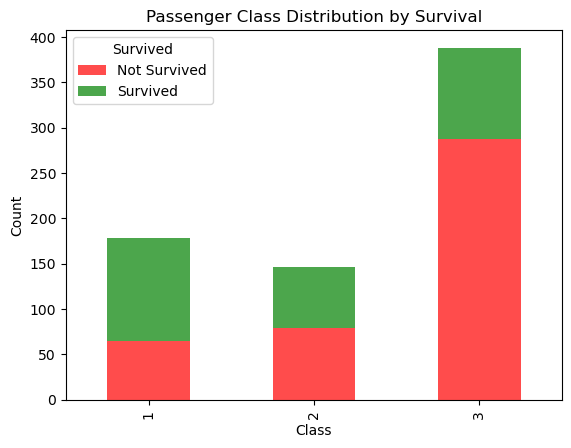

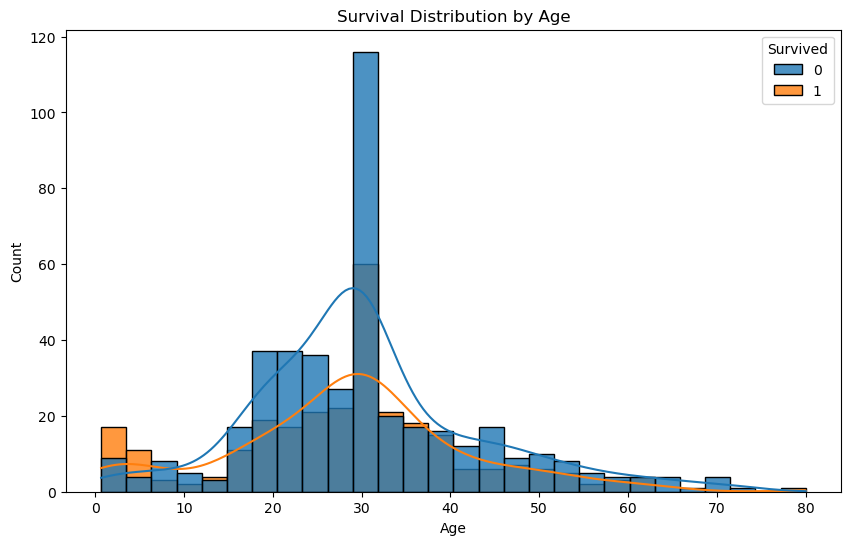

In [49]:
# ויזואליזציה של הישרדות לפי מין
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Survived', loc='upper right')
plt.show()

# ויזואליזציה של מחלקות הנוסעים לפי הישרדות עם גרף מוערם 
plt.figure(figsize=(10, 6))
pclass_survived_counts = train_df.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)
pclass_survived_counts.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.title('Passenger Class Distribution by Survival')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'])
plt.show()

#ויזואליזציה של הישרדות לפי גיל
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x="Age", hue="Survived", kde=True, alpha=0.8)
plt.title('Survival Distribution by Age')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [52]:
# הכנת עמודות ותוויות
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_df[feature_cols]
X_test = test_df[feature_cols]

y_train = train_df['Survived']
y_test = test_df['Survived']

# הגדרת המודל
scaler_step = ('scale', StandardScaler())
model = Pipeline([('scale', StandardScaler()), ('clf',   KNeighborsClassifier())])

# הגדרת היפר-פרמטרים
param_grid = [
    # KNN
    {
        'scale'          : [StandardScaler(), 'passthrough'],
        'clf'            : [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__metric'    : ['euclidean', 'manhattan', 'minkowski']
    },
    # Decision Tree
    {
        'scale'          : [StandardScaler(), 'passthrough'],
        'clf'            : [DecisionTreeClassifier(random_state=0)],
        'clf__max_depth' : [3, 5, 7, 9],
        'clf__max_leaf_nodes': [10, 20, 30, 40, 50]
    }
]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf': [KNeighborsClassifier()],
                          'clf__metric': ['euclidean', 'manhattan',
                                          'minkowski'],
                          'clf__n_neighbors': [3, 5, 7, 9],
                          'scale': [StandardScaler(), 'passthrough']},
                         {'clf': [DecisionTreeClassifier(random_state=0)],
                          'clf__max_depth': [3, 5, 7, 9],
                          'clf__max_leaf_nodes': [10, 20, 30, 40, 50],
                          'scale': [StandardScaler(), 'passthrough']}],
             scoring='f1_macro')

In [54]:
# הצגת תוצאות
results = pd.DataFrame(grid.cv_results_)
results['Model']   = results['param_clf'].apply(lambda m: type(m).__name__)
results['Scaling'] = results['param_scale'].apply(lambda s: 'Yes' if isinstance(s, StandardScaler) else 'No')
results['Hyper-params'] = results['params'].apply(lambda d: {k.split('__')[-1]: v for k, v in d.items() if k.startswith('clf__')})
top10 = (results[['Model','Scaling','mean_test_score','std_test_score','Hyper-params']]
         .rename(columns={'mean_test_score':'Mean F1','std_test_score':'Std'}).sort_values('Mean F1', ascending=False).head(10))
print("10 התוצאות הטובות ביותר:")
print(top10.to_markdown(index=False))

# הצגת המודל המנצח
best_model = grid.best_estimator_
test_pred  = best_model.predict(X_test)
print("\n תוצאות הבדיקה של המודל הטוב ביותר")
print(classification_report(y_test, test_pred, target_names=['Not Survived','Survived']))

#  השוואת Accuracy / F1 – המודלים וה-Scaling הטובים ביותר
summary_rows = []
best_param_rows = []

# שולף את השורה המובילה לכל שילוב Model+Scaling
best_per_group = (results.sort_values('mean_test_score', ascending=False).groupby(['Model','Scaling']).head(1))
for _, row in best_per_group.iterrows():
    params     = row['params']
    model_name = row['Model']
    scaling    = row['Scaling']
    model_tmp = clone(model)
    model_tmp.set_params(**params)
    model_tmp.fit(X_train, y_train)
    pred = model_tmp.predict(X_test)
    summary_rows.append({
        'Model'   : model_name,
        'Scaling' : scaling,
        'Accuracy': accuracy_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred, average='macro')
    })
    best_param_rows.append({
        'Model' : f"{model_name} {'Scaling' if scaling=='Yes' else 'No Scaling'}",
        'Best Hyperparameters' : {k:v for k,v in params.items() if k.startswith('clf__')}
    })

summary_df = pd.DataFrame(summary_rows).sort_values(['Model','Scaling'])
best_params_df = pd.DataFrame(best_param_rows)
print("\n השוואת התוצאות בין המודלים:")
print(summary_df.to_markdown(index=False))
print("\n ההיפר-פרמטרים הטובים ביותר שנבחרו ב-Grid Search:")
print(best_params_df.to_markdown(index=False))

10 התוצאות הטובות ביותר:
| Model                  | Scaling   |   Mean F1 |       Std | Hyper-params                           |
|:-----------------------|:----------|----------:|----------:|:---------------------------------------|
| DecisionTreeClassifier | Yes       |  0.797153 | 0.0335162 | {'max_depth': 5, 'max_leaf_nodes': 10} |
| DecisionTreeClassifier | No        |  0.797153 | 0.0335162 | {'max_depth': 5, 'max_leaf_nodes': 10} |
| DecisionTreeClassifier | Yes       |  0.795839 | 0.0424108 | {'max_depth': 3, 'max_leaf_nodes': 50} |
| DecisionTreeClassifier | Yes       |  0.795839 | 0.0424108 | {'max_depth': 3, 'max_leaf_nodes': 30} |
| DecisionTreeClassifier | Yes       |  0.795839 | 0.0424108 | {'max_depth': 3, 'max_leaf_nodes': 20} |
| DecisionTreeClassifier | No        |  0.795839 | 0.0424108 | {'max_depth': 3, 'max_leaf_nodes': 10} |
| DecisionTreeClassifier | Yes       |  0.795839 | 0.0424108 | {'max_depth': 3, 'max_leaf_nodes': 10} |
| DecisionTreeClassifier | No        | 

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [57]:
best_params = grid.best_params_      

# יצירת העתק של המודל
final_model = clone(model)
final_model.set_params(**best_params) 

final_model.fit(X_train, y_train)
print(f"!המודל אומן בהצלחה על נתוני האימון")

!המודל אומן בהצלחה על נתוני האימון


## Part 5 - Apply on test and show model performance estimation

In [64]:
y_test_pred = final_model.predict(X_test)

# הצגת חמשת התחזיות הראשונות
print("תוצאות 5 התחזיות הראשונות(שרד = 1, לא שרד = 0):")
print(pd.DataFrame({'PassengerId': test_df.index[:5], 'Predicted': y_test_pred[:5], 'Actual' : y_test[:5].values}))

test_f1  = f1_score(y_test, y_test_pred, average='macro')
test_acc = accuracy_score(y_test, y_test_pred)

print("\nתוצאות הבדיקה על נתוני הבדיקה:")
print(classification_report(y_test, y_test_pred, target_names=['Not Survived','Survived']))
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test F1-macro: {test_f1:.3f}")
print(f"CV F1-macro (5-fold): {grid.best_score_:.3f}")

תוצאות 5 התחזיות הראשונות(שרד = 1, לא שרד = 0):
   PassengerId  Predicted  Actual
0            0          0       0
1            1          0       0
2            2          0       0
3            3          1       0
4            4          0       1

תוצאות הבדיקה על נתוני הבדיקה:
              precision    recall  f1-score   support

Not Survived       0.87      0.85      0.86       118
    Survived       0.72      0.75      0.74        61

    accuracy                           0.82       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Test Accuracy: 0.816
Test F1-macro: 0.797
CV F1-macro (5-fold): 0.797
